In [56]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf
import os
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [57]:
img_array = cv2.imread('C:\\Users\\DELL\\AMIT\\hackathon_tensorflow\\data\\train\\Closed_Eyes\\s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

(86, 86)

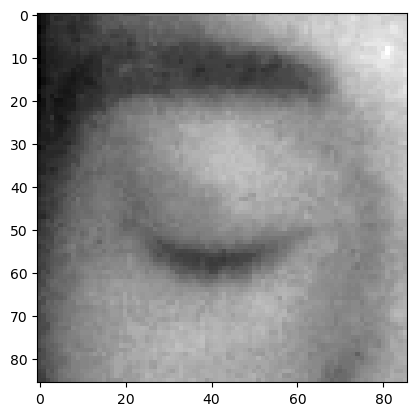

In [58]:
plt.imshow(img_array,cmap='gray')
img_array.shape

In [59]:
img_array = cv2.imread('C:\\Users\\DELL\\AMIT\\hackathon_tensorflow\\data\\train\\Open_Eyes\\s0001_02334_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)


(83, 83)

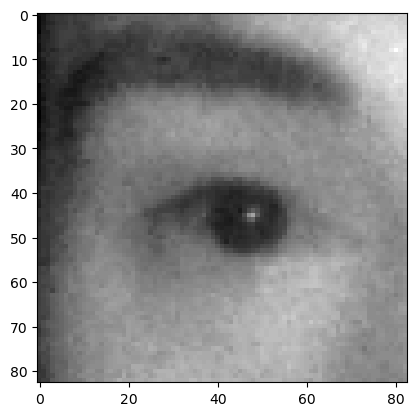

In [60]:
plt.imshow(img_array,cmap='gray')
img_array.shape

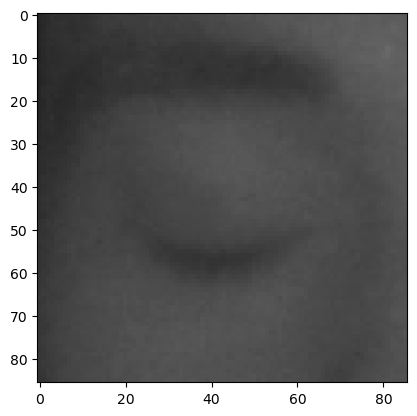

In [61]:
Datadirectory = "C:\\Users\\DELL\\AMIT\\hackathon_tensorflow\\data\\train"
Classes = ['Closed_Eyes', 'Open_Eyes']
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtrob = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(backtrob)  # Display the color image
        plt.show()
        break
    break 

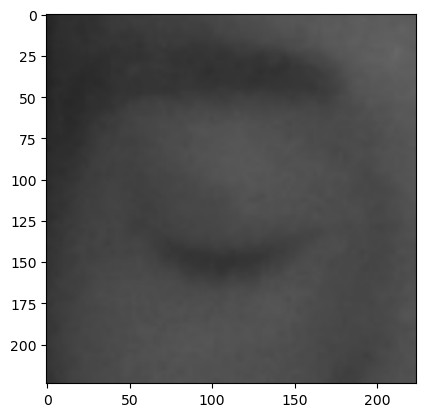

In [62]:
img_size = 224
new_array = cv2.resize(backtrob, (img_size, img_size))  # Provide both width and height
plt.imshow(new_array, cmap='gray')
plt.show()

In [63]:
img_size = 224
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtrob = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtrob, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [64]:
create_training_Data()
print(len(training_Data))

4000


In [65]:
import random 
random.shuffle(training_Data)

In [66]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
X = X / 255.0
Y = np.array(y)

In [67]:
X.shape

(4000, 224, 224, 3)

In [68]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('Y.pickle', 'wb')
pickle.dump(Y, pickle_out)
pickle_out.close()


In [69]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

pickle_in = open('Y.pickle', 'rb')
Y = pickle.load(pickle_in)

In [70]:
model = tf.keras.applications.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [71]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [72]:
flat_layer = Flatten()(base_output)
final_output = Dense(1, activation='sigmoid')(flat_layer)


In [73]:
new_model = tf.keras.Model(inputs=base_input, outputs=final_output)
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [74]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [128]:
new_model.fit(X, Y, epochs=20, validation_split=0.1)

Epoch 1/20
113/113 [==============================] - 122s 1s/step - loss: 3.6148e-05 - accuracy: 1.0000 - val_loss: 1.8397e-05 - val_accuracy: 1.0000
Epoch 2/20
113/113 [==============================] - 120s 1s/step - loss: 6.7870e-05 - accuracy: 1.0000 - val_loss: 8.0184e-06 - val_accuracy: 1.0000
Epoch 3/20
113/113 [==============================] - 181s 2s/step - loss: 1.7639e-05 - accuracy: 1.0000 - val_loss: 8.2362e-06 - val_accuracy: 1.0000
Epoch 4/20
113/113 [==============================] - 212s 2s/step - loss: 1.2876e-05 - accuracy: 1.0000 - val_loss: 7.0114e-06 - val_accuracy: 1.0000
Epoch 5/20
113/113 [==============================] - 213s 2s/step - loss: 7.7298e-06 - accuracy: 1.0000 - val_loss: 5.0041e-06 - val_accuracy: 1.0000
Epoch 6/20
113/113 [==============================] - 158s 1s/step - loss: 4.6903e-05 - accuracy: 1.0000 - val_loss: 4.4217e-06 - val_accuracy: 1.0000
Epoch 7/20
113/113 [==============================] - 147s 1s/step - loss: 4.3063e-06 - accura

In [129]:
new_model.save('my_model20.h5')

In [130]:
new_model = tf.keras.models.load_model('my_model20.h5')

In [131]:
img_array = cv2.imread('C:\\Users\\DELL\\AMIT\\hackathon_tensorflow\\data\\train\\Open_Eyes\\s0001_02334_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtrob = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtrob,(img_size,img_size))

In [132]:
X_input= (np.array(new_array).reshape(1,img_size,img_size,3))

In [133]:
X_input.shape

(1, 224, 224, 3)

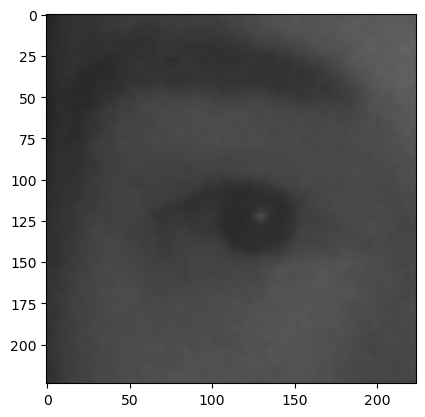

In [134]:
plt.imshow(new_array)

In [135]:
X_input = X_input/255.0

In [136]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 266ms/step


In [137]:
prediction

array([[1.]], dtype=float32)

In [138]:
img_array = cv2.imread('C:\\Users\\DELL\\AMIT\\hackathon_tensorflow\\data\\train\\Closed_Eyes\\s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtrob = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtrob,(img_size,img_size))

In [139]:
X_input= (np.array(new_array).reshape(1,img_size,img_size,3))

In [140]:
X_input.shape

(1, 224, 224, 3)

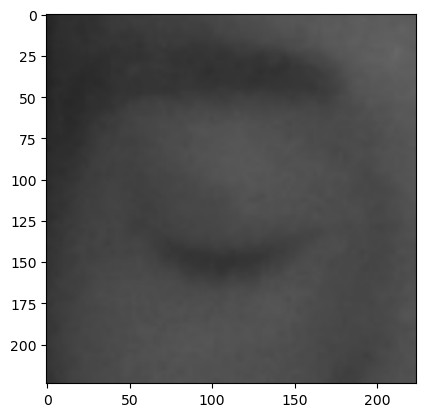

In [141]:
plt.imshow(new_array)

In [142]:
X_input = X_input/255.0

In [143]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 36ms/step


In [144]:
prediction

array([[4.3040065e-09]], dtype=float32)

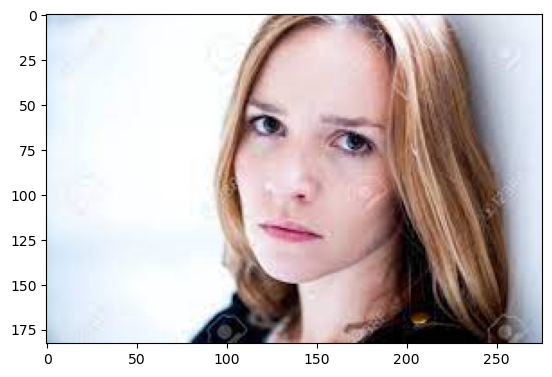

In [145]:
img = cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [146]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [147]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [148]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [149]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [150]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

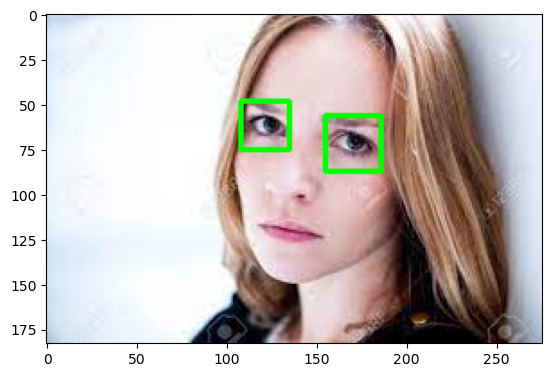

In [151]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [152]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    rol_gray = gray[y:y+h,x:x+w]
    rol_color = img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(rol_gray)
    if len(eyes) == 0:
        print('eyes are not detected')
    else:
        for(ex,ey,ew,eh) in eyes:
            eyes_rol = rol_color[ey:ey+eh,ex:ex +ew]

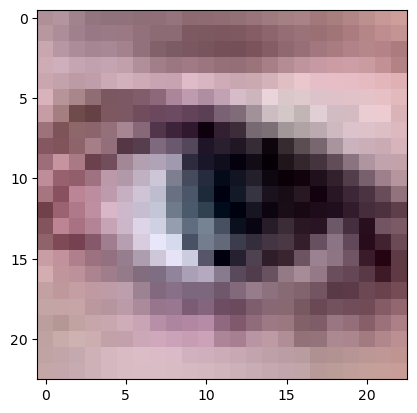

In [153]:
plt.imshow(cv2.cvtColor(eyes_rol,cv2.COLOR_BGR2RGB))

In [154]:
eyes_rol.shape

(23, 23, 3)

In [155]:
final_image = cv2.resize(eyes_rol,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/225.0

In [156]:
final_image.shape

(1, 224, 224, 3)

In [157]:
new_model.predict(final_image)

1/1 [==============================] - 0s 39ms/step


array([[0.22594066]], dtype=float32)

In [159]:
import cv2
import numpy as np


path = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + path)
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    print(prediction)

    status = 'Drousy'  # Initialize status variable

    for (x, y, w, h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes_roi = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes_roi) == 0:
            print('Eyes are not detected')
            
        else:
            for (ex, ey, ew, eh) in eyes_roi:
                eyes_rol = roi_color[ey:ey+eh, ex:ex+ew]

            final_image = cv2.resize(eyes_rol, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = final_image / 255.0

            # Assuming you have a pre-trained model loaded as new_model
            prediction = new_model.predict(final_image)

            if prediction > 0:
                status = 'Awake'
            else:
                status = 'Drousy'
               

    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in eyes:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)

    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[[0.4288157]]
1/1 [==============================] - 0s 33ms/step
Eyes are not detected
[[0.4956869]]
1/1 [==============================] - 0s 33ms/step
[[0.00491839]]
1/1 [==============================] - 0s 32ms/step
[[0.0249939]]
1/1 [==============================] - 0s 29ms/step
[[0.02242506]]
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
[[0.02397709]]
1/1 [==============================] - 0s 30ms/step
[[0.01967824]]
1/1 [==============================] - 0s 30ms/step
[[0.01908489]]
1/1 [==============================] - 0s 28ms/step
Eyes are not detected
[[0.02586744]]
1/1 [==============================] - 0s 29ms/step
[[0.02203784]]
1/1 [==============================] - 0s 29ms/step
[[0.02672507]]
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
[[0.00986811]]
1/1 [==============================] - 0s 30ms/step
[[0.00719286]]
1/1 [==============================] - 0s 34

1/1 [==============================] - 0s 36ms/step
Eyes are not detected
[[0.00043305]]
1/1 [==============================] - 0s 36ms/step
[[0.00981139]]
1/1 [==============================] - 0s 37ms/step
[[0.01624098]]
1/1 [==============================] - 0s 36ms/step
[[0.02969539]]
1/1 [==============================] - 0s 37ms/step
[[0.01515035]]
1/1 [==============================] - 0s 40ms/step
[[0.02484722]]
Eyes are not detected
1/1 [==============================] - 0s 38ms/step
[[0.01573892]]
1/1 [==============================] - 0s 36ms/step
[[0.01375792]]
Eyes are not detected
1/1 [==============================] - 0s 34ms/step
[[0.01542645]]
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 36ms/step
[[0.02242821]]
1/1 [==============================] - 0s 39ms/step
[[0.00577114]]
1/1 [==============================] - 0s 38ms/step
[[0.01700897]]
1/1 [==============================] - 0s 37ms/step
Eyes are not detected
1/1 [=======

1/1 [==============================] - 0s 39ms/step
[[0.01490382]]
Eyes are not detected
[[0.01490382]]
1/1 [==============================] - 0s 35ms/step
[[0.01397025]]
Eyes are not detected
[[0.01397025]]
Eyes are not detected
[[0.01397025]]
1/1 [==============================] - 0s 33ms/step
[[0.0152896]]
1/1 [==============================] - 0s 33ms/step
[[0.02438736]]
Eyes are not detected
[[0.02438736]]
1/1 [==============================] - 0s 37ms/step
[[0.00085741]]
1/1 [==============================] - 0s 33ms/step
[[0.00417141]]
1/1 [==============================] - 0s 35ms/step
Eyes are not detected
1/1 [==============================] - 0s 37ms/step
[[0.00949503]]
1/1 [==============================] - 0s 31ms/step
[[0.00654828]]
Eyes are not detected
1/1 [==============================] - 0s 33ms/step
Eyes are not detected
[[0.00921161]]
1/1 [==============================] - 0s 32ms/step
[[0.00844715]]
1/1 [==============================] - 0s 37ms/step
Eyes are not 

1/1 [==============================] - 0s 38ms/step
Eyes are not detected
[[0.07010542]]
1/1 [==============================] - 0s 36ms/step
[[0.03413787]]
1/1 [==============================] - 0s 38ms/step
Eyes are not detected
Eyes are not detected
[[0.01578635]]
1/1 [==============================] - 0s 37ms/step
[[0.04024187]]
1/1 [==============================] - 0s 37ms/step
Eyes are not detected
Eyes are not detected
[[0.31355932]]
Eyes are not detected
[[0.31355932]]
Eyes are not detected
[[0.31355932]]
Eyes are not detected
1/1 [==============================] - 0s 37ms/step
[[0.00383232]]
Eyes are not detected
1/1 [==============================] - 0s 36ms/step
[[0.01023632]]
1/1 [==============================] - 0s 36ms/step
Eyes are not detected
[[0.00143981]]
Eyes are not detected
Eyes are not detected
[[0.00143981]]
1/1 [==============================] - 0s 32ms/step
Eyes are not detected
1/1 [==============================] - 0s 32ms/step
[[0.08103137]]
Eyes are not d

1/1 [==============================] - 0s 34ms/step
[[0.01331446]]
1/1 [==============================] - 0s 34ms/step
Eyes are not detected
[[0.02060275]]
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 32ms/step
[[0.02511993]]
1/1 [==============================] - 0s 38ms/step
[[0.0520085]]
1/1 [==============================] - 0s 39ms/step
Eyes are not detected
[[0.0116277]]
1/1 [==============================] - 0s 40ms/step
[[0.02984337]]
1/1 [==============================] - 0s 33ms/step
[[0.02547877]]
1/1 [==============================] - 0s 32ms/step
[[0.0220377]]
1/1 [==============================] - 0s 35ms/step
[[0.02555553]]
Eyes are not detected
1/1 [==============================] - 0s 36ms/step
[[0.02038597]]
1/1 [==============================] - 0s 45ms/step
[[0.01589433]]
1/1 [==============================] - 0s 34ms/step
[[0.01826249]]
Eyes are not detected
1/1 [==============================] - 0s 32ms/step
[[0.0192971]]
1

1/1 [==============================] - 0s 39ms/step
[[0.0123071]]
1/1 [==============================] - 0s 38ms/step
[[0.0203387]]
1/1 [==============================] - 0s 38ms/step
[[0.04149019]]
Eyes are not detected
1/1 [==============================] - 0s 40ms/step
[[0.01712713]]
1/1 [==============================] - 0s 37ms/step
[[0.03382863]]
1/1 [==============================] - 0s 33ms/step
[[0.02515319]]
1/1 [==============================] - 0s 32ms/step
[[0.02488505]]
1/1 [==============================] - 0s 32ms/step
[[0.01609716]]
1/1 [==============================] - 0s 33ms/step
Eyes are not detected
[[0.01308835]]
1/1 [==============================] - 0s 36ms/step
[[0.01787738]]
Eyes are not detected
1/1 [==============================] - 0s 35ms/step
[[0.03655269]]
1/1 [==============================] - 0s 35ms/step
[[0.01868844]]
1/1 [==============================] - 0s 40ms/step
[[0.02008165]]
1/1 [==============================] - 0s 36ms/step
[[0.01564253]

1/1 [==============================] - 0s 35ms/step
[[0.01310862]]
1/1 [==============================] - 0s 38ms/step
[[0.01724081]]
1/1 [==============================] - 0s 37ms/step
[[0.02209001]]
1/1 [==============================] - 0s 36ms/step
Eyes are not detected
[[0.01320089]]
Eyes are not detected
1/1 [==============================] - 0s 38ms/step
[[0.03353186]]
Eyes are not detected
1/1 [==============================] - 0s 39ms/step
[[0.01246326]]
1/1 [==============================] - 0s 39ms/step
[[0.0296551]]
1/1 [==============================] - 0s 38ms/step
[[0.06071328]]
1/1 [==============================] - 0s 34ms/step
[[0.0258335]]
1/1 [==============================] - 0s 36ms/step
[[0.04554965]]
Eyes are not detected
1/1 [==============================] - 0s 38ms/step
[[0.0359216]]
1/1 [==============================] - 0s 36ms/step
[[0.02032193]]
Eyes are not detected
1/1 [==============================] - 0s 35ms/step
[[0.03655165]]
1/1 [=================

In [55]:
import cv2
import numpy as np
import pygame

pygame.init()
pygame.mixer.init()

counter = 0

path = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + path)
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    
    status = 'Drowsy'  # Initialize status variable

    for (x, y, w, h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes_roi = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes_roi) == 0:
            print('Eyes are not detected')
        else:
            for (ex, ey, ew, eh) in eyes_roi:
                eyes_rol = roi_color[ey:ey+eh, ex:ex+ew]

            final_image = cv2.resize(eyes_rol, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = final_image / 255.0

            # Assuming you have a pre-trained model loaded as new_model
            prediction = new_model.predict(final_image)

            if prediction > 0:
                status = 'Awake'
            elif prediction < 0:
                status = 'Drowsy'
                counter += 1
                
                if counter > 5:
                    pygame.mixer.music.load('Best_Alarm.mp3')
                    pygame.mixer.music.play()
                    counter = 0
                else:
                     pygame.mixer.music.stop()
                    

    for (x, y, w, h) in eyes:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)

    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 28ms/step
Eyes are not detected
1/1 [==============================] - 0s 32ms/step
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
1/1 [==============================] - 0s 28ms/step
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
Eyes are not detected
1/1 [==============================] - 0s 28ms/step
Eyes are not detected
1/1 [==============================] - 0s 28ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
1/1 [==============================] - 0s 28ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 28ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
1/1 [==============================] - 0s 29ms

1/1 [==============================] - 0s 29ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
Eyes are not detected
1/1 [==============================] - 0s 31ms/step
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 28ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [=====================

Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 29ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 30ms/step
Eyes

In [54]:
import cv2
import tkinter as tk
from PIL import Image, ImageTk
import numpy as np

class CameraApp:
    def __init__(self, window, window_title, new_model):
        self.window = window
        self.window.title(window_title)

        # Open the camera
        self.cap = cv2.VideoCapture(0)

        # Create canvas to display frames
        self.canvas = tk.Canvas(window, width=self.cap.get(3), height=self.cap.get(4), bg='black')
        self.canvas.pack()

        # Create a rounded "Start Camera" button
        self.btn_start = tk.Canvas(window, width=150, height=50, bg='#4CAF50', highlightthickness=0)
        self.btn_start.pack(padx=10, pady=10)
        self.btn_start.create_text(75, 25, text="Start Camera", fill='white', font=('Helvetica', 12))

        self.btn_start.bind("<Button-1>", self.toggle_camera)

        self.is_camera_on = False
        self.update()

        # Haarcascades for face and eye detection
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

        # Drowsiness detection variables
        self.status = 'Drowsy'
        self.drowsy_threshold = 0.5

        # Store the pre-trained model as an instance variable
        self.new_model = new_model

        # Bind the close event to the close method
        self.window.protocol("WM_DELETE_WINDOW", self.close)

    def toggle_camera(self, event):
        if self.is_camera_on:
            self.is_camera_on = False
            self.btn_start.configure(bg='#4CAF50')
            self.btn_start.itemconfig(2, text="Start Camera")
        else:
            self.is_camera_on = True
            self.btn_start.configure(bg='#FF5733')
            self.btn_start.itemconfig(2, text="Stop Camera")

    def update(self):
        if self.is_camera_on:
            # Capture frame-by-frame
            ret, frame = self.cap.read()

            # Apply color mapping to the frame
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Face and eye detection
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)
            eyes_roi = []  # Initialize to an empty list

            for (x, y, w, h) in faces:
                cv2.rectangle(frame_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

                roi_gray = gray[y:y+h, x:x+w]
                roi_color = frame_rgb[y:y+h, x:x+w]
                eyes_roi = self.eye_cascade.detectMultiScale(roi_gray)

                if len(eyes_roi) == 0:
                    print('Eyes are not detected')
                    break  # Exit the loop if eyes are not detected

                for (ex, ey, ew, eh) in eyes_roi:
                    eyes_rol = roi_color[ey:ey+eh, ex:ex+ew]

                final_image = cv2.resize(eyes_rol, (224, 224))
                final_image = np.expand_dims(final_image, axis=0)
                final_image = final_image / 255.0

                # Use the stored model for prediction
                prediction = self.new_model.predict(final_image)

                if prediction > 0:
                    self.status = 'Awake'
                elif prediction < 0:
                    self.status = 'Drowsy'

            for (ex, ey, ew, eh) in eyes_roi:  # Correct indentation
                cv2.rectangle(frame_rgb, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(frame_rgb, self.status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)

            cv2.imshow('Drowsiness Detection', frame_rgb)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                self.is_camera_on = False  # Stop camera on 'q' key press

            # Convert the frame to ImageTk format
            img = ImageTk.PhotoImage(image=Image.fromarray(frame_rgb))

            # Update the canvas with the new frame
            self.canvas.create_image(0, 0, anchor=tk.NW, image=img)
            self.canvas.image = img

        # Repeat the update method after 10 milliseconds
        self.window.after(10, self.update)

    def close(self):
        # Release the camera and close the window
        self.cap.release()
        self.window.destroy()

# Example usage assuming 'new_model' is a pre-trained model loaded before this point
root = tk.Tk()
# Replace 'new_model' with the actual instance of your pre-trained model
app = CameraApp(root, "Combined App: Camera + Drowsiness Detection", new_model)
root.mainloop()
